In [ ]:
!pip install diffusers accelerate bitsnbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached

In [ ]:
# Import libraries
import diffusers
from diffusers import AutoPipelineForText2Image
import torch
import pandas as pd
from google.colab import files
from psutil import virtual_memory
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from sklearn.datasets import fetch_20newsgroups
import torch
from PIL import Image
from io import BytesIO

# Check GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)

if gpu_info.find('failed') >= 0:

  print('Not connected to a GPU')

else:

  print(gpu_info)

# Check RAM
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:

  print('Not using a high-RAM runtime')

else:

  print('You are using a high-RAM runtime!')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Tue May  7 14:05:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype = torch.float16, variant = "fp16").to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
%time image = pipeline('Draw a heroic belgian malinois dog that is bravely about to face an adversary, agitated and ready')

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 3.5 s, sys: 318 ms, total: 3.82 s
Wall time: 4.2 s


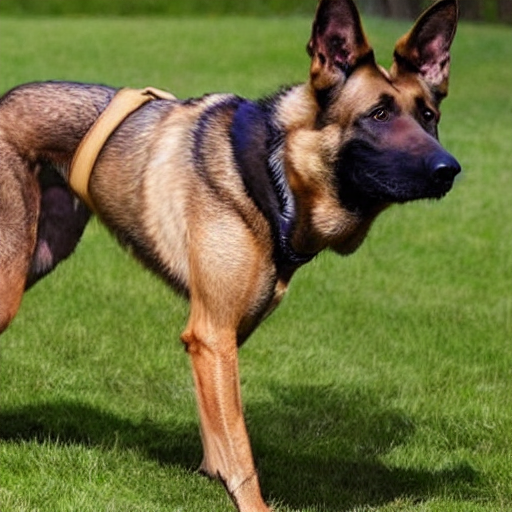

In [ ]:
image.images[0]

In [ ]:
%time image = pipeline('Draw a heroic belgian malinois dog that is bravely about to face an adversary, agitated and ready')

In [ ]:
image.save('dawg.png')

In [ ]:
%time image = pipeline('cyberpunk warrior dawg masterpiece 8k', num_inference_steps = 500).images[0]

  0%|          | 0/500 [00:00<?, ?it/s]

CPU times: user 1min 21s, sys: 237 ms, total: 1min 22s
Wall time: 1min 21s


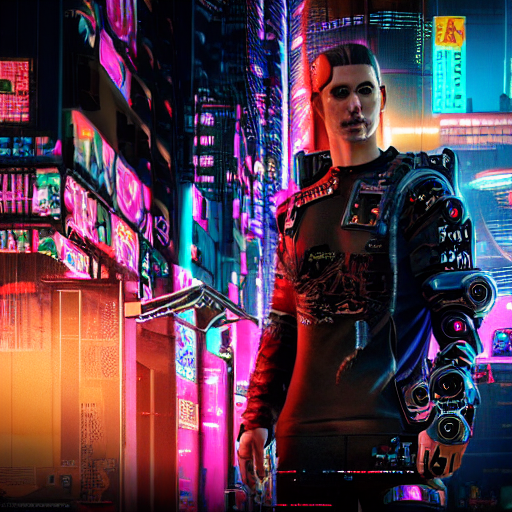

In [ ]:
image

In [ ]:
#%time image = pipeline(''' Depict an 8k image of a dog trained in protection that is snarling and guarding its handler. The environment should be cyberpunk digital realm.''', num_inference_steps = 1000).images[0]

In [ ]:
##mage

In [ ]:
%time image = pipeline('8k cool guy cartoon').images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 8.26 s, sys: 39.5 ms, total: 8.3 s
Wall time: 8.13 s


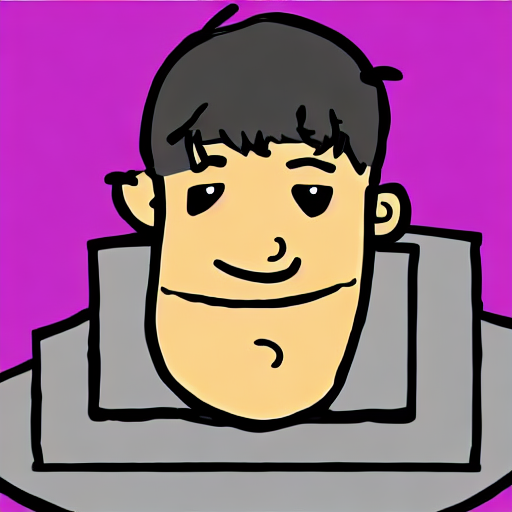

In [ ]:
image

In [ ]:
%time logo = pipeline("Create a cyberpunk logo for a protection dog team, centered composition, promotional graphic masterpiece 8k ", num_inference_steps = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 15.7 s, sys: 31.4 ms, total: 15.7 s
Wall time: 15.5 s


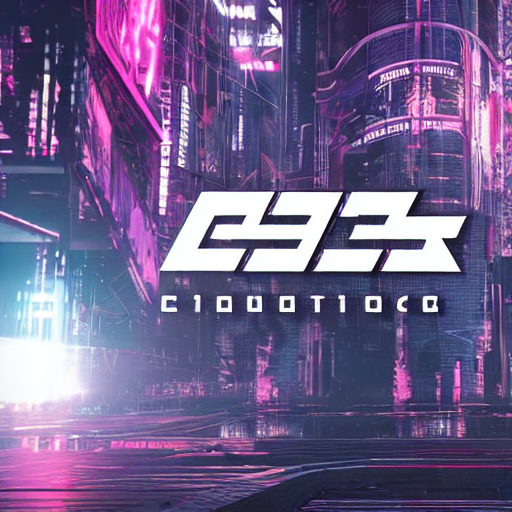

In [ ]:
logo.images[0]

In [ ]:
i2ipipe = StableDiffusionImg2ImgPipeline.from_pretrained(, torch_dtype=torch.float16)
i2ipipe = i2ipipe.to('cuda'')

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

prompt = "A fantasy landscape, trending on artstation"

images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
images[0].save("fantasy_landscape.png")